## Задача 1. Стохастическая матрица и собственное значение, равное 1.

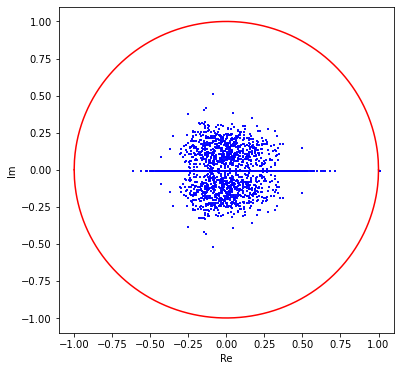

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 4
n = 1000
lambdas = np.array([])

for j in range(n):
    A = np.random.uniform(size=(N, N))
    for k in range(A.shape[0]):
        A[k] = A[k] / A[k].sum()
    eigenvalues = np.linalg.eig(A)[0]
    lambdas = np.concatenate((lambdas, eigenvalues))
    
fig = plt.figure(figsize = (6,6))

plt.scatter(lambdas.real, lambdas.imag, s = 1,marker='s', color='blue')

x = np.linspace(-1,1,1000)
plt.plot(x, np.sqrt(1-x**2),color = 'red')
plt.plot(x, -np.sqrt(1-x**2),color = 'red')
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()


[[0.03494135 0.40032247 0.1303166  0.17648171 0.25793787]
 [0.12057177 0.00159139 0.32142792 0.21206615 0.34434277]
 [0.15651357 0.1969189  0.34723064 0.19078409 0.10855281]
 [0.28269641 0.10734129 0.18130733 0.16268898 0.26596599]
 [0.21927908 0.01954688 0.27640511 0.3353344  0.14943453]]


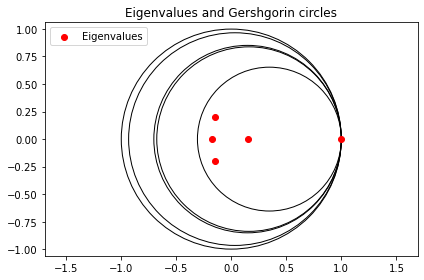

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N = 5
fig, ax = plt.subplots(1, 1)
a = np.random.uniform(size=(N, N))
for k in range(a.shape[0]):
    a[k] = a[k] / a[k].sum()
print(a)
xg = np.diag(a).real
yg = np.diag(a).imag
rg = np.zeros(n)
ev = np.linalg.eigvals(a)
for i in range(N):
    rg[i] = np.sum(np.abs(a[i, :])) - np.abs(a[i, i])
    crc = plt.Circle((xg[i], yg[i]), radius=rg[i], fill=False)
    ax.add_patch(crc)
plt.scatter(ev.real, ev.imag, color='r', label="Eigenvalues")
plt.axis('equal')
plt.legend()
ax.set_title('Eigenvalues and Gershgorin circles')
fig.tight_layout()

## Задача 5. Матрица вида диагональная матрица плюс матрица малого ранга.

Матрица $wu^*$ имеет ранг 1, поэтому собственным значением матрицы $I + wu^{*}$ являются 1 с кратностью 1. Поскольку $tr(I + wu^*) = \sum\limits_{i=1}^n \lambda_i = n - 1 + \lambda_n = n + \sum\limits_{i = 1}^n w_iu_i^* \Rightarrow \det(I + wu^*) = \lambda_n = 1 + \sum\limits_{i = 1}^n w_iu_i^*$. Подставляя $w = \rho (D - \lambda I)^{-1}u$, получаем исходное утверждение.

Теорему Коши о чередовании можно сформулировать следующим образом:
    
Пусть $\{\lambda_i\}_{i = 1}^n$ - упорядоченные по возрастанию вещественные собственные значения матрицы $A$ размера $n$, $B$ - матрица возмущения ранга 1. Тогда все собственные значения $\{\mu\}_{i = 1}^n$ матрицы A + B лежат между соседними собсвенными числами матрицы A:

$\lambda_i<\mu_i<\lambda_{i+1}$

## Задача 6. Нелинейное характеристическое уравнение.

In [41]:
#c_1 = (d_1-x_prev)**3/(d_1-d_2)*(f'(x) - 1/2*f''(x)*(d_2-x))

def f(x,d,u,rho):
    delta = d-x
    return 1 + (rho*u/delta).sum()

def f_derivative(x,d,u,rho):
    delta = (d-x)**2
    return (rho*u/delta).sum()

def f_derivative2(x,d,u,rho):
    delta = (d-x)**3
    return (2*rho*u/delta).sum()



def eq_solver(d,u,rho,x_pred,eps = 1e-6):
    i = 0
    while (x_pred > d[i+1]):
        i += 1
    
    x_prev = x_pred
    
    d1 = d[i]
    d2 = d[i+1]
    c1 = (d1-x_prev)**3/(d1-d2)*(f_derivative(x_prev,d,u,rho) -\
                                    1/2*f_derivative2(x_prev,d,u,rho)*(d2-x_prev))
    c2 = (d2-x_prev)**3/(d2-d1)*(f_derivative(x_prev,d,u,rho) -\
                                    1/2*f_derivative2(x_prev,d,u,rho)*(d1-x_prev))
    c0 = f(x_prev,d,u,rho) - c1/(d1-x_prev) - c2/(d2-x_prev)
    x_curr = 1/(2*c0)*(c1+c2+c0*d1+c0*d2+\
                         np.sqrt((c1+c2+c0*d1+c0*d2)**2-4*c0*(c2*d1+c1*d2+c0*d1*d2)))
    if(f(x_prev,d,u,rho)<0):
            x_curr = 1/(2*c0)*(c1+c2+c0*d1+c0*d2-\
                         np.sqrt((c1+c2+c0*d1+c0*d2)**2-4*c0*(c2*d1+c1*d2+c0*d1*d2)))
        
        else:
            x_curr = 1/(2*c0)*(c1+c2+c0*d1+c0*d2+\
                         np.sqrt((c1+c2+c0*d1+c0*d2)**2-4*c0*(c2*d1+c1*d2+c0*d1*d2)))
    
    while(np.linalg.norm(x_curr-x_prev)>eps):
        x_prev = x_curr
        c1 = (d1-x_prev)**3/(d1-d2)*(f_derivative(x_prev,d,u,rho) -\
                                    1/2*f_derivative2(x_prev,d,u,rho)*(d2-x_prev))
        c2 = (d2-x_prev)**3/(d2-d1)*(f_derivative(x_prev,d,u,rho) -\
                                    1/2*f_derivative2(x_prev,d,u,rho)*(d1-x_prev))
        c0 = f(x_prev,d,u,rho) - c1/(d1-x_prev) - c2/(d2-x_prev)
        if(f(x_prev,d,u,rho)<0):
            x_curr = 1/(2*c0)*(c1+c2+c0*d1+c0*d2-\
                         np.sqrt((c1+c2+c0*d1+c0*d2)**2-4*c0*(c2*d1+c1*d2+c0*d1*d2)))
        
        else:
            x_curr = 1/(2*c0)*(c1+c2+c0*d1+c0*d2+\
                         np.sqrt((c1+c2+c0*d1+c0*d2)**2-4*c0*(c2*d1+c1*d2+c0*d1*d2)))
    return x_curr

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 37)

In [39]:
x = eq_solver(np.array([1,2,3,4]),np.array([1,1,1,1]), 0.2, 1.14, eps = 1e-6)
print(x)

2.8115173680154966
-482.55191542126704
x_curr =  2.8115173680154966
nan


C:\Users\User\AppData\Local\Temp\ipykernel_1688\3257078508.py:50: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt((c1+c2+c0*d1+c0*d2)**2-4*c0*(c2*d1+c1*d2+c0*d1*d2)))


## Задача 7. Теорема Лёвнера (Charles Loewner).

Мы можем проделать те же операции, что и в задаче 5. В итоге мы приходим к уравнению:

$1+\sum\limits_{i = 1}^n \dfrac{|u_i|^2}{d_i-\alpha_i}=0$.

Возьмем $u_i$ вещественными и подставим $u_i^2 = \dfrac{\prod\limits_{j= 1}^n (\alpha_j - d_i)}{\prod\limits_{j= 1, j\neq i}^n (d_j - d_i)}:$

$1+\sum\limits_{i=1}^n \prod\limits_{j = 1, j\neq i}^n \dfrac{\alpha_j-d_i}{d_j-d_i} = 0$. (Очевидно 😃). Значит, $\alpha_i$ являются собственными значениями матрицы с таким $u$, утверждение доказано.